
# **XG BOOST에 필요한 라이브러리 호출**


In [1]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

# **데이터 불러오기**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE3.csv', encoding='euc-kr')

In [6]:
df

,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
0,0,201901,서울중랑경찰서,37,6,8,4,5,6,3,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
1,1,201901,서울노원경찰서,62,6,6,13,7,16,5,...,468,1776,770,253,108,서울특별시 노원구 노원로 283(하계동),서울특별시,노원구,37.641975,127.070799
2,2,201901,부산해운대경찰서,37,3,5,7,6,3,8,...,300,1104,482,142,95,부산광역시 해운대구 달맞이길62번길 42(중동),부산광역시,해운대구,35.158240,129.171762
3,3,201901,울산중부경찰서,56,7,6,9,8,4,11,...,387,1396,649,173,72,울산광역시 중구 번영로 620(남외동),울산광역시,중구,35.569829,129.349216
4,4,201901,대구성서경찰서,24,6,1,5,0,5,2,...,212,862,362,125,54,대구광역시 달서구 달구벌대로259길 15(이곡동),대구광역시,달서구,35.853219,128.508774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,8522,202112,인천논현경찰서,39,8,1,7,1,4,4,...,274,1010,516,139,60,인천광역시 남동구 논현고잔로 239,인천광역시,남동구,37.404077,126.715039
8523,8523,202112,부산중부경찰서,19,0,1,0,2,6,4,...,30,103,36,5,6,부산광역시 중구 중앙대로 105(대창동1가),부산광역시,중구,35.107421,129.035925
8524,8524,202112,대전서부경찰서,20,4,3,1,4,3,2,...,247,1029,473,133,69,대전광역시 서구 복수서로 47(복수동),대전광역시,서구,36.309045,127.373459
8525,8525,202112,함안경찰서,1,0,1,0,0,0,0,...,33,87,58,13,4,경상남도 함안군 가야읍 가야로 85,경상남도,함안군,35.279147,128.410910


# **XG BOOST에 필요한 변수 생성**

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target ,test_size=0.2)

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)

In [7]:
print(df.keys())

Index(['Unnamed: 0', 'ACPT_YM', 'PLCST_NM', 'RPRT_CASCNT_WHOL',
       'OCRN_DOTW_SNDD', 'OCRN_DOTW_MON', 'OCRN_DOTW_TUE', 'OCRN_DOTW_WED',
       'OCRN_DOTW_THU', 'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT', 'TIZN_1', 'TIZN_2',
       'TIZN_3', 'TIZN_4', 'SCHOOL_RPRT_CASCNT_WHOL', 'SCHOOL_OCRN_DOTW_SNDD',
       'SCHOOL_OCRN_DOTW_MON', 'SCHOOL_OCRN_DOTW_TUE', 'SCHOOL_OCRN_DOTW_WED',
       'SCHOOL_OCRN_DOTW_THU', 'SCHOOL_OCRN_DOTW_FRI', 'SCHOOL_OCRN_DOTW_SAT',
       'SCHOOL_TIZN_1', 'SCHOOL_TIZN_2', 'SCHOOL_TIZN_3', 'SCHOOL_TIZN_4',
       'STRD_YR', 'CHILD_RPRT_CASCNT_WHOL', 'CHILD_DSTVC_RPRT_CNT',
       'CHILD_CHLAB_ASMP', 'CHILD_CHLAB_ETC', 'CHILD_OCRN_DOTW_SNDD',
       'CHILD_OCRN_DOTW_MON', 'CHILD_OCRN_DOTW_TUE', 'CHILD_OCRN_DOTW_WED',
       'CHILD_OCRN_DOTW_THU', 'CHILD_OCRN_DOTW_FRI', 'CHILD_OCRN_DOTW_SAT',
       'CHILD_TIZN_1', 'CHILD_TIZN_2', 'CHILD_TIZN_3', 'CHILD_TIZN_4', 'ADDR',
       'SI', 'SGG', 'LON', 'LAT'],
      dtype='object')


In [8]:
df.plcst = df['PLCST_NM'].unique()
df.plcst
print(df.plcst)
print(len(df.plcst))
print(df.plcst[253])
print(df.plcst[168])

['서울중랑경찰서' '서울노원경찰서' '부산해운대경찰서' '울산중부경찰서' '대구성서경찰서' '전주완산경찰서' '대전중부경찰서'
 '삼척경찰서' '괴산경찰서' '서산경찰서' '금산경찰서' '영주경찰서' '남양주경찰서' '동두천경찰서' '화성동탄경찰서'
 '제주자치경찰단' '천안동남경찰서' '부천소사경찰서' '이천경찰서' 'ETC' '서울방배경찰서' '동해경찰서' '진천경찰서'
 '마산중부경찰서' '남해경찰서' '무주경찰서' '창원중부경찰서' '서대문경찰서' '서울용산경찰서' '서울성북경찰서' '성동경찰서'
 '서울강서경찰서' '부산동부경찰서' '대구북부경찰서' '인천서부경찰서' '연수경찰서' '울산남부경찰서' '동부경찰서'
 '서울광진경찰서' '울산울주경찰서' '광주북부경찰서' '인천삼산경찰서' '속초경찰서' '포항남부경찰서' '진해경찰서' '정읍경찰서'
 '양주경찰서' '포천경찰서' '가평경찰서' '일산서부경찰서' '수원중부경찰서' '안양동안경찰서' '군포경찰서' '성남수정경찰서'
 '의왕경찰서' '하남경찰서' '여주경찰서' '횡성경찰서' '고흥경찰서' '담양경찰서' '서울수서경찰서' '인천중부경찰서'
 '전주덕진경찰서' '대전동부경찰서' '제주서부경찰서' '김해중부경찰서' '태백경찰서' '양구경찰서' '충주경찰서' '서천경찰서'
 '여수경찰서' '서귀포경찰서' '구리경찰서' '태안경찰서' '오산경찰서' '천안서북경찰서' '대구강북경찰서' '대전유성경찰서'
 '수원남부경찰서' '안양만안경찰서' '광명경찰서' '안산단원경찰서' '용인동부경찰서' '김포경찰서' '서울서초경찰서'
 '부산사상경찰서' '부산연제경찰서' '광주동부경찰서' '강진경찰서' '서울남대문경찰서' '옥천경찰서' '단양경찰서' '의성경찰서'
 '영등포경찰서' '부산동래경찰서' '부산사하경찰서' '광주남부경찰서' '대전대덕경찰서' '강릉경찰서' '당진경찰서' '진주경찰서'
 '통영경찰서' '거제경찰서' '함양경찰서' '광양경찰서' '일산동부경찰서' '기장경찰서' '세종경찰서' '용인서부경찰서'
 

In [9]:
print(len(df.plcst))
df.plcst

275


array(['서울중랑경찰서', '서울노원경찰서', '부산해운대경찰서', '울산중부경찰서', '대구성서경찰서', '전주완산경찰서',
       '대전중부경찰서', '삼척경찰서', '괴산경찰서', '서산경찰서', '금산경찰서', '영주경찰서', '남양주경찰서',
       '동두천경찰서', '화성동탄경찰서', '제주자치경찰단', '천안동남경찰서', '부천소사경찰서', '이천경찰서',
       'ETC', '서울방배경찰서', '동해경찰서', '진천경찰서', '마산중부경찰서', '남해경찰서', '무주경찰서',
       '창원중부경찰서', '서대문경찰서', '서울용산경찰서', '서울성북경찰서', '성동경찰서', '서울강서경찰서',
       '부산동부경찰서', '대구북부경찰서', '인천서부경찰서', '연수경찰서', '울산남부경찰서', '동부경찰서',
       '서울광진경찰서', '울산울주경찰서', '광주북부경찰서', '인천삼산경찰서', '속초경찰서', '포항남부경찰서',
       '진해경찰서', '정읍경찰서', '양주경찰서', '포천경찰서', '가평경찰서', '일산서부경찰서', '수원중부경찰서',
       '안양동안경찰서', '군포경찰서', '성남수정경찰서', '의왕경찰서', '하남경찰서', '여주경찰서', '횡성경찰서',
       '고흥경찰서', '담양경찰서', '서울수서경찰서', '인천중부경찰서', '전주덕진경찰서', '대전동부경찰서',
       '제주서부경찰서', '김해중부경찰서', '태백경찰서', '양구경찰서', '충주경찰서', '서천경찰서', '여수경찰서',
       '서귀포경찰서', '구리경찰서', '태안경찰서', '오산경찰서', '천안서북경찰서', '대구강북경찰서',
       '대전유성경찰서', '수원남부경찰서', '안양만안경찰서', '광명경찰서', '안산단원경찰서', '용인동부경찰서',
       '김포경찰서', '서울서초경찰서', '부산사상경찰서', '부산연제경찰서', '광주동부경찰서', '강진경찰서',
    

In [10]:
df0 = df.set_index('PLCST_NM')

In [11]:
df0

,Unnamed: 0,ACPT_YM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,OCRN_DOTW_SAT,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
PLCST_NM,,,,,,,,,,,,,,,,,,,,,
서울중랑경찰서,0,201901,37,6,8,4,5,6,3,5,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울노원경찰서,1,201901,62,6,6,13,7,16,5,9,...,468,1776,770,253,108,서울특별시 노원구 노원로 283(하계동),서울특별시,노원구,37.641975,127.070799
부산해운대경찰서,2,201901,37,3,5,7,6,3,8,5,...,300,1104,482,142,95,부산광역시 해운대구 달맞이길62번길 42(중동),부산광역시,해운대구,35.158240,129.171762
울산중부경찰서,3,201901,56,7,6,9,8,4,11,11,...,387,1396,649,173,72,울산광역시 중구 번영로 620(남외동),울산광역시,중구,35.569829,129.349216
대구성서경찰서,4,201901,24,6,1,5,0,5,2,5,...,212,862,362,125,54,대구광역시 달서구 달구벌대로259길 15(이곡동),대구광역시,달서구,35.853219,128.508774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천논현경찰서,8522,202112,39,8,1,7,1,4,4,14,...,274,1010,516,139,60,인천광역시 남동구 논현고잔로 239,인천광역시,남동구,37.404077,126.715039
부산중부경찰서,8523,202112,19,0,1,0,2,6,4,6,...,30,103,36,5,6,부산광역시 중구 중앙대로 105(대창동1가),부산광역시,중구,35.107421,129.035925
대전서부경찰서,8524,202112,20,4,3,1,4,3,2,3,...,247,1029,473,133,69,대전광역시 서구 복수서로 47(복수동),대전광역시,서구,36.309045,127.373459


In [12]:
df.plcst[0]

'서울중랑경찰서'

In [13]:
df0.loc[df.plcst[0],:]

,Unnamed: 0,ACPT_YM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,OCRN_DOTW_SAT,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
PLCST_NM,,,,,,,,,,,,,,,,,,,,,
서울중랑경찰서,0,201901,37,6,8,4,5,6,3,5,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,233,201902,56,6,8,2,7,11,6,16,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,466,201903,125,22,23,17,11,14,17,21,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,708,201904,102,12,13,18,12,16,18,13,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,939,201905,174,16,14,24,33,26,31,30,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1189,201906,224,48,28,24,21,21,31,51,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1435,201907,130,23,19,12,26,17,15,18,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1682,201908,163,22,18,12,24,19,37,31,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1934,201909,199,55,28,22,28,21,21,24,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468



# **반복문 이용하여 경찰서별 XG BOOST 모델 학습**

In [14]:
## 제주경찰청 데이터가 두개밖에 없어서 test size가 0.5 이하로 나와서 에러가 생기는 것 같다
## if len(df_i) < 3 이면 학습모델 실행하지 않고 preds_i = 0 찍고 넘어가는 것으로 개선
## if len(df_i) > 36 이면 이상치 데이터로 보고 학습모델 실행하지 않고 넘어가는 것으로 개선

In [15]:
#  빈 리스트를 하나 만들어주고 반복문마다 결과를 추가
preds = []

In [16]:
for i in range(len(df.plcst)):
  print(i,".", df.plcst[i])
  df_i = df0.loc[df.plcst[i],:]
  if len(df_i) < 3:
    preds_i = [0]
    preds.append(preds_i)
    print("12월 예상 건수:", preds_i)
    continue
  if len(df_i) > 36:
    preds_i = [0]
    preds.append(preds_i)
    print("12월 예상 건수:", preds_i)
    continue
  df1 = df_i[df_i['ACPT_YM'] < 202112]
  df2 = df_i[df_i['ACPT_YM'] == 202112]
  df1.data = df1.drop(columns=['Unnamed: 0', 'RPRT_CASCNT_WHOL', 'ADDR', 'SI', 'SGG'])
  df2.data = df2.drop(columns=['Unnamed: 0', 'RPRT_CASCNT_WHOL', 'ADDR', 'SI', 'SGG' ])
  df1.target = pd.DataFrame(df1['RPRT_CASCNT_WHOL'])
  df2.target = pd.DataFrame(df2['RPRT_CASCNT_WHOL'])
  X_train, X_test, y_train, y_test = train_test_split(df1.data, df1.target ,test_size=0.2)
  xgb_model = xgboost.XGBRegressor(objective = 'reg:linear', n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,colsample_bytree=0.5, max_depth=7)
  xgb_model.fit(X_train,y_train)
  pred_test = xgb_model.predict(X_test)
  preds_i = xgb_model.predict(df2.data)
  preds.append(preds_i)
  print("12월 예상 건수:", preds_i)
  print("12월 실제 건수", df2.target['RPRT_CASCNT_WHOL'])

0 . 서울중랑경찰서
[12:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [97.39233]
12월 실제 건수 PLCST_NM
서울중랑경찰서    85
Name: RPRT_CASCNT_WHOL, dtype: int64
1 . 서울노원경찰서
[12:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [69.84566]
12월 실제 건수 PLCST_NM
서울노원경찰서    65
Name: RPRT_CASCNT_WHOL, dtype: int64
2 . 부산해운대경찰서
[12:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [36.6877]
12월 실제 건수 PLCST_NM
부산해운대경찰서    43
Name: RPRT_CASCNT_WHOL, dtype: int64
3 . 울산중부경찰서
[12:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [60.23728]
12월 실제 건수 PLCST_NM
울산중부경찰서    50
Name: RPRT_CASCNT_WHOL, dtype: int64
4 . 대구성서경찰서
[12:26:01] WARNING: /workspace/src/objective/regression_obj.cu:

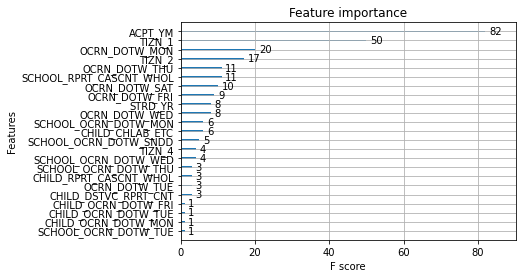

In [17]:
xgboost.plot_importance(xgb_model)
plt.rcParams['figure.figsize']=[10,5]
plt.show()

In [18]:
preds = pd.DataFrame(preds)
preds.info

<bound method DataFrame.info of              0
0    97.392326
1    69.845657
2    36.687698
3    60.237282
4    23.898483
..         ...
270        NaN
271   0.000000
272   0.000000
273   0.000000
274   0.000000

[275 rows x 1 columns]>

In [19]:
preds.isnull().sum()

0    44
dtype: int64

In [20]:
## 결측치 0으로 fillna 로 처리, index와 칼럼명 지정
preds.fillna(0, inplace = True)

preds.rename(columns={0: 'preds'}, inplace=True)
preds


,preds
0,97.392326
1,69.845657
2,36.687698
3,60.237282
4,23.898483
...,...
270,0.000000
271,0.000000
272,0.000000
273,0.000000


In [21]:
df.plcst = pd.DataFrame(df.plcst)
df.plcst

,0
0,서울중랑경찰서
1,서울노원경찰서
2,부산해운대경찰서
3,울산중부경찰서
4,대구성서경찰서
...,...
270,곡성경찰서
271,대전경찰청
272,울릉경찰서
273,영양경찰서


In [22]:
df2 = df[df['ACPT_YM'] == 202112]
df.rprt = df2[['RPRT_CASCNT_WHOL','PLCST_NM']]
df.rprt = pd.DataFrame(df.rprt)
df.rprt.set_index('PLCST_NM', inplace = True)
df.rprt

,RPRT_CASCNT_WHOL
PLCST_NM,
ETC,351
천안동남경찰서,46
화성동탄경찰서,49
마산중부경찰서,5
울산중부경찰서,50
...,...
인천논현경찰서,39
부산중부경찰서,19
대전서부경찰서,20


In [23]:
result0 = preds.join(df.plcst)
result0.rename(columns={0: 'PLCST_NM'}, inplace=True)

result0.set_index('PLCST_NM', inplace = True)
result0

,preds
PLCST_NM,
서울중랑경찰서,97.392326
서울노원경찰서,69.845657
부산해운대경찰서,36.687698
울산중부경찰서,60.237282
대구성서경찰서,23.898483
...,...
곡성경찰서,0.000000
대전경찰청,0.000000
울릉경찰서,0.000000


In [24]:
result0 = result0.join(df.rprt)
result0

,preds,RPRT_CASCNT_WHOL
PLCST_NM,,
ETC,472.661713,351.0
가평경찰서,0.000000,NaN
강남경찰서,16.791101,18.0
강릉경찰서,30.695555,30.0
강원경찰청,0.000000,NaN
...,...,...
화성동탄경찰서,64.817841,49.0
화성서부경찰서,31.447641,34.0
화순경찰서,7.947680,3.0


In [25]:
result0.isna().sum()

preds                0
RPRT_CASCNT_WHOL    52
dtype: int64

In [26]:
result0.fillna(0, inplace = True)
result0

,preds,RPRT_CASCNT_WHOL
PLCST_NM,,
ETC,472.661713,351.0
가평경찰서,0.000000,0.0
강남경찰서,16.791101,18.0
강릉경찰서,30.695555,30.0
강원경찰청,0.000000,0.0
...,...,...
화성동탄경찰서,64.817841,49.0
화성서부경찰서,31.447641,34.0
화순경찰서,7.947680,3.0


# **성능지표결과**

In [27]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

In [28]:
rprt = result0['RPRT_CASCNT_WHOL'].values
pred = result0['preds'].values

In [29]:
mse = mean_squared_error(rprt, pred)
rmse = mse ** 0.5
r2 = r2_score(rprt, pred)
print("RMSE:",rmse)
print("r2 score:",r2)

RMSE: 8.983050783211263
r2 score: 0.9175122759305627


# **관측치와** 예측결과 비교 시각화

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)
print(mpl.rcParams['font.family'])

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

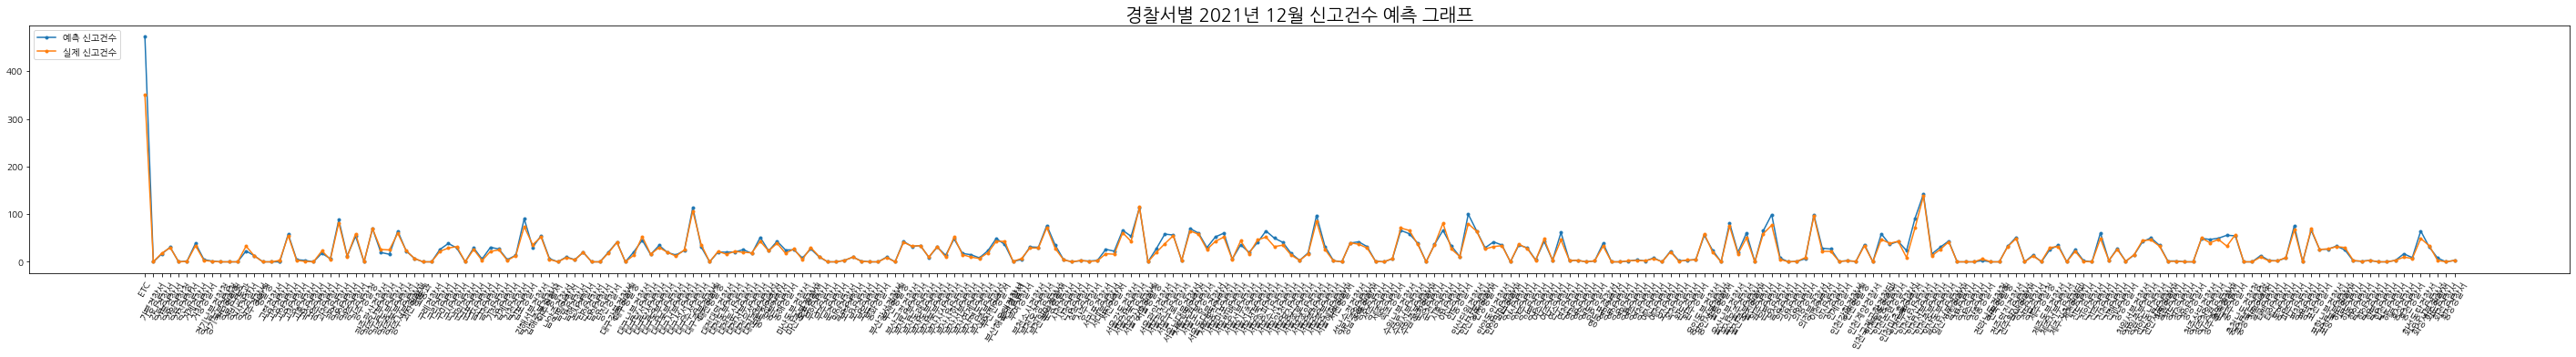

In [32]:
plt.figure(figsize=(50, 5))
plt.plot(result0, marker = 'o', markersize = 3)
plt.legend(['예측 신고건수','실제 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("경찰서별 2021년 12월 신고건수 예측 그래프", size = 20)

mpl.rc('axes', unicode_minus=False)

# **지도 시각화**

In [33]:
df_loc = df0[['LON','LAT']]
df_loc

,LON,LAT
PLCST_NM,,
서울중랑경찰서,37.618254,127.104468
서울노원경찰서,37.641975,127.070799
부산해운대경찰서,35.158240,129.171762
울산중부경찰서,35.569829,129.349216
대구성서경찰서,35.853219,128.508774
...,...,...
인천논현경찰서,37.404077,126.715039
부산중부경찰서,35.107421,129.035925
대전서부경찰서,36.309045,127.373459


In [34]:
result1 = df_loc.loc[~df_loc.index.duplicated(keep='first')]
result1

,LON,LAT
PLCST_NM,,
서울중랑경찰서,37.618254,127.104468
서울노원경찰서,37.641975,127.070799
부산해운대경찰서,35.158240,129.171762
울산중부경찰서,35.569829,129.349216
대구성서경찰서,35.853219,128.508774
...,...,...
곡성경찰서,NaN,NaN
대전경찰청,36.354950,127.386297
울릉경찰서,37.484309,130.905852


In [35]:
result1.isna().sum()

LON    3
LAT    3
dtype: int64

In [36]:
import requests

In [37]:
result1.loc['곡성경찰서']['LON'] = 35.283777464
result1.loc['곡성경찰서']['LAT'] = 127.298776987
result1.loc['곡성경찰서']

LON     35.283777
LAT    127.298777
Name: 곡성경찰서, dtype: float64

In [38]:
print(result1.loc['전라남도경찰청'])

url_front = "http://api.vworld.kr/req/address?"
url_params = "service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type=road"
url_address = "&address="
url_key = "&key="

address = "전남 무안군 삼향읍 후광대로359번길 28" #전라남도경찰청
auth_key = 'AB55CED9-6A22-3636-98AF-0B0DEA4EAE45'

# url 완성
url = url_front + url_params + url_address + address + url_key + auth_key

print(url)

result = requests.get(url)
json_data = result.json()

print(json_data)

if json_data['response']['status'] == 'OK':
    x = json_data['response']['result']['point']['x']
    y = json_data['response']['result']['point']['y']
    result1.loc['전라남도경찰청']['LON'] = y
    result1.loc['전라남도경찰청']['LAT'] = x

print(result1.loc['전라남도경찰청'])

LON   NaN
LAT   NaN
Name: 전라남도경찰청, dtype: float64
http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type=road&address=전남 무안군 삼향읍 후광대로359번길 28&key=AB55CED9-6A22-3636-98AF-0B0DEA4EAE45
{'response': {'service': {'name': 'address', 'version': '2.0', 'operation': 'getcoord', 'time': '38(ms)'}, 'status': 'OK', 'input': {'type': 'road', 'address': '전남 무안군 삼향읍 후광대로359번길 28'}, 'refined': {'text': '전라남도 무안군 삼향읍 후광대로359번길 28', 'structure': {'level0': '대한민국', 'level1': '전라남도', 'level2': '무안군', 'level3': '삼향읍', 'level4L': '후광대로359번길', 'level4LC': '', 'level4A': '삼향읍', 'level4AC': '4684025600', 'level5': '28', 'detail': ''}}, 'result': {'crs': 'EPSG:4326', 'point': {'x': '126.469639275', 'y': '34.816581231'}}}}
LON     34.816581
LAT    126.469639
Name: 전라남도경찰청, dtype: float64


In [39]:
print(result1.loc['전라남도경찰청'])

url_front = "http://api.vworld.kr/req/address?"
url_params = "service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type=road"
url_address = "&address="
url_key = "&key="

address = "전남 무안군 삼향읍 후광대로359번길 28" #청주청원경찰서
auth_key = 'AB55CED9-6A22-3636-98AF-0B0DEA4EAE45'

# url 완성
url = url_front + url_params + url_address + address + url_key + auth_key

print(url)

result = requests.get(url)
json_data = result.json()

print(json_data)

if json_data['response']['status'] == 'OK':
    x = json_data['response']['result']['point']['x']
    y = json_data['response']['result']['point']['y']
    result1.loc['청주청원경찰서']['LON'] = y
    result1.loc['청주청원경찰서']['LAT'] = x

print(result1.loc['청주청원경찰서'])

LON     34.816581
LAT    126.469639
Name: 전라남도경찰청, dtype: float64
http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type=road&address=전남 무안군 삼향읍 후광대로359번길 28&key=AB55CED9-6A22-3636-98AF-0B0DEA4EAE45
{'response': {'service': {'name': 'address', 'version': '2.0', 'operation': 'getcoord', 'time': '33(ms)'}, 'status': 'OK', 'input': {'type': 'road', 'address': '전남 무안군 삼향읍 후광대로359번길 28'}, 'refined': {'text': '전라남도 무안군 삼향읍 후광대로359번길 28', 'structure': {'level0': '대한민국', 'level1': '전라남도', 'level2': '무안군', 'level3': '삼향읍', 'level4L': '후광대로359번길', 'level4LC': '', 'level4A': '삼향읍', 'level4AC': '4684025600', 'level5': '28', 'detail': ''}}, 'result': {'crs': 'EPSG:4326', 'point': {'x': '126.469639275', 'y': '34.816581231'}}}}
LON     34.816581
LAT    126.469639
Name: 청주청원경찰서, dtype: float64


In [40]:
result1

,LON,LAT
PLCST_NM,,
서울중랑경찰서,37.618254,127.104468
서울노원경찰서,37.641975,127.070799
부산해운대경찰서,35.158240,129.171762
울산중부경찰서,35.569829,129.349216
대구성서경찰서,35.853219,128.508774
...,...,...
곡성경찰서,35.283777,127.298777
대전경찰청,36.354950,127.386297
울릉경찰서,37.484309,130.905852


In [41]:
prediction = pd.DataFrame(result0['preds'])

In [42]:
result2 = prediction.join(result1)
result2

,preds,LON,LAT
PLCST_NM,,,
ETC,472.661713,35.973544,126.713400
가평경찰서,0.000000,37.825535,127.515018
강남경찰서,16.791101,37.509367,127.067100
강릉경찰서,30.695555,37.768715,128.906821
강원경찰청,0.000000,37.861894,127.757293
...,...,...,...
화성동탄경찰서,64.817841,37.207494,127.077415
화성서부경찰서,31.447641,37.160502,126.903131
화순경찰서,7.947680,34.891564,126.989139


In [43]:
result2.reset_index(inplace = True)

result2 = result2.rename(columns={"PLCST_NM":"경찰서",'LON':'LAT', 'LAT':'LON'})
result2

,경찰서,preds,LAT,LON
0,ETC,472.661713,35.973544,126.713400
1,가평경찰서,0.000000,37.825535,127.515018
2,강남경찰서,16.791101,37.509367,127.067100
3,강릉경찰서,30.695555,37.768715,128.906821
4,강원경찰청,0.000000,37.861894,127.757293
...,...,...,...,...
271,화성동탄경찰서,64.817841,37.207494,127.077415
272,화성서부경찰서,31.447641,37.160502,126.903131
273,화순경찰서,7.947680,34.891564,126.989139
274,화천경찰서,0.000000,38.106380,127.707742


In [44]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import folium

In [46]:
map = folium.Map(location = [36,127], zoom_start = 9)
map

In [47]:
for i in result2.index:
  name = result2.loc[i, "경찰서"]
  lat = result2.loc[i, "LAT"]
  lon = result2.loc[i, "LON"]
  folium.Circle([result2['LAT'][i],result2['LON'][i]], radius= result2['preds'][i]*10, color='#FF0000', fill=True, fill_color="'#FF0000'").add_to(map)

map